# Limits: The Foundation of Calculus

Great work on understanding functions! Now we'll explore limits, which form the foundation of calculus.

In [1]:
# Setting up our environment
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp  # Symbolic mathematics library

%matplotlib inline
plt.style.use("seaborn-v0_8")

## What is a Limit?

A limit describes the value a function approaches as the input approaches a particular value. We write:

$$\lim_{x \to a} f(x) = L$$

This means: "as x gets closer and closer to a, the function f(x) gets closer and closer to L."

## Why Limits Matter

Limits allow us to:
- Define derivatives (which we'll explore soon)
- Analyze function behavior at points where the function isn't defined
- Understand continuity of functions

## Understanding Limits Simply

When we write $$\lim_{x \to a} f(x) = L$$

we are asking what value does f(x) get very close to when x gets very close to a?"

### The Direct Substitution Method

For most well-behaved functions, finding a limit is straightforward:
1. Take the value that x is approaching (let's call it a)
2. Plug this value directly into the function f(x)
3. The result is your limit

This works because many functions are "continuous" - which just means there are no sudden jumps, gaps, or breaks in their graphs.

In [2]:
# Let's create a function to visualize how function values approach a limit
def visualize_limit(f: callable, a: float, x_range: list = None, title: str = None) -> None:
    """Visualize how a function approaches a limit.
    
    Args:
        f: The function to visualize
        a: The x-value where we're evaluating the limit
        x_range: Optional range for x-axis [min, max]
        title: Optional plot title
        
    Returns:
        matplotlib Figure object
    """
    if x_range is None:
        x_range = [a-2, a+2]
        
    # Create x values, carefully avoiding the limit point if needed
    x_left = np.linspace(x_range[0], a-0.0001, 1000)
    x_right = np.linspace(a+0.0001, x_range[1], 1000)
    
    # Create the plot first
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Calculate function values and plot point by point to avoid array issues
    y_left = np.array([f(xi) for xi in x_left])
    y_right = np.array([f(xi) for xi in x_right])
    
    # Try to evaluate at the limit point
    try:
        y_at_a = f(a)
        limit_exists_at_a = True
    except Exception as e:
        print(f"Note: Couldn't evaluate at x={a}: {e}")
        limit_exists_at_a = False
    
    # Plot the function
    ax.plot(x_left, y_left, "b-")
    ax.plot(x_right, y_right, "b-")
    
    # Mark the limit point
    if limit_exists_at_a:
        ax.plot(a, y_at_a, "ro", markersize=8, label=f"f({a}) = {y_at_a:.4f}")
    
    # Add vertical line at x=a
    ax.axvline(x=a, color="gray", linestyle="--", alpha=0.7)
    
    ax.grid(True)
    ax.set_title(title if title else f"Limit of f(x) as x approaches {a}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.legend()
    
    plt.tight_layout()

### Example with Numbers

Consider $f(x) = x^2$ and we want $\lim_{x \to 3} x^2$

If we use direct substitution:
- Plug in x = 3 into $x^2$
- Get $3^2 = 9$
- Therefore, $\lim_{x \to 3} x^2 = 9$

You can verify this by calculating values very close to 3:
- When x = 2.9, f(x) = 8.41
- When x = 2.99, f(x) = 8.94
- When x = 2.999, f(x) = 8.994
- When x = 3.001, f(x) = 9.006
- When x = 3.01, f(x) = 9.06
- When x = 3.1, f(x) = 9.61

Notice how the function values get closer and closer to 9 as x gets closer to 3.

   x      |    f(x)   
-----------------------
   2.9     |  8.410000 
   2.99    |  8.940100 
  2.999    |  8.994001 
  2.9999   |  8.999400 
    3      |  9.000000 
  3.0001   |  9.000600 
  3.001    |  9.006001 
   3.01    |  9.060100 
   3.1     |  9.610000 


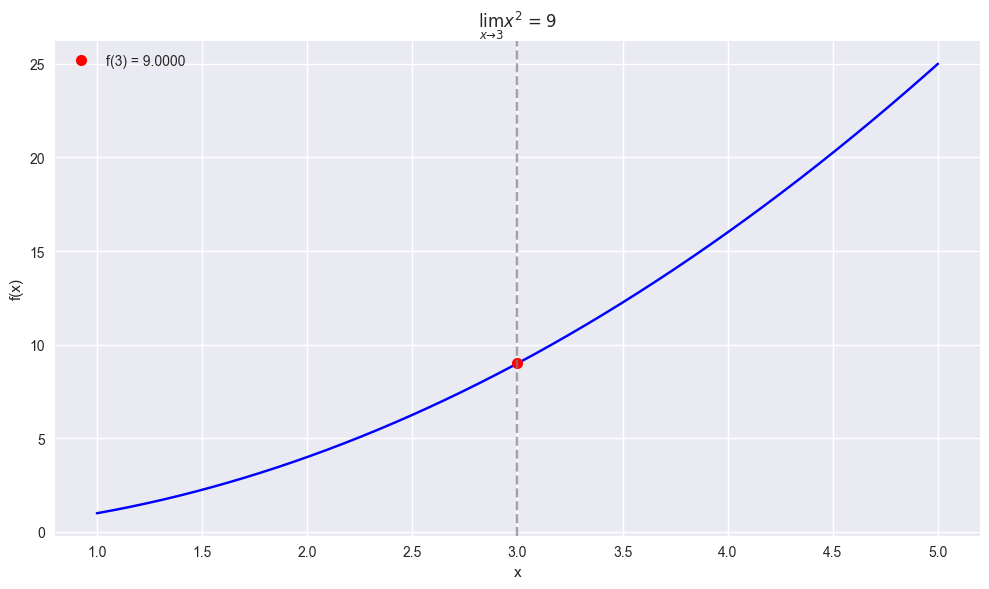

In [3]:
# Let's demonstrate this limit numerically
def f(x: float) -> float:
    """Calculate x squared.
    
    Args:
        x: The input value
        
    Returns:
        The square of x
    """
    return x**2

# Create a table of values approaching x = 3 from both sides
x_values = [2.9, 2.99, 2.999, 2.9999, 3, 3.0001, 3.001, 3.01, 3.1]
f_values = [f(x) for x in x_values]

# Print the table
print("   x      |    f(x)   ")
print("-"*23)
for x, y in zip(x_values, f_values):
    print(f"{x:^10} | {y:^10.6f}")

# Visualize the limit using the updated visualize_limit function
fig = visualize_limit(f, 3, title=r"$\lim_{x \to 3} x^2 = 9$")

### When Direct Substitution Doesn't Work

Direct substitution doesn't work when:
1. Plugging in the value gives $\frac{0}{0}$, $\frac{\infty}{\infty}$, or other undefined results
2. The function has a discontinuity (jump or gap) at that point

For these cases, we need other techniques like factoring, rationalizing, or approaching from both sides.

   x      |    g(x)   
-----------------------
   0.9     |  2.710000 
   0.99    |  2.970100 
  0.999    |  2.997001 
  0.9999   |  2.999700 
   x=1     | undefined 
  1.0001   |  3.000300 
  1.001    |  3.003001 
   1.01    |  3.030100 
   1.1     |  3.310000 


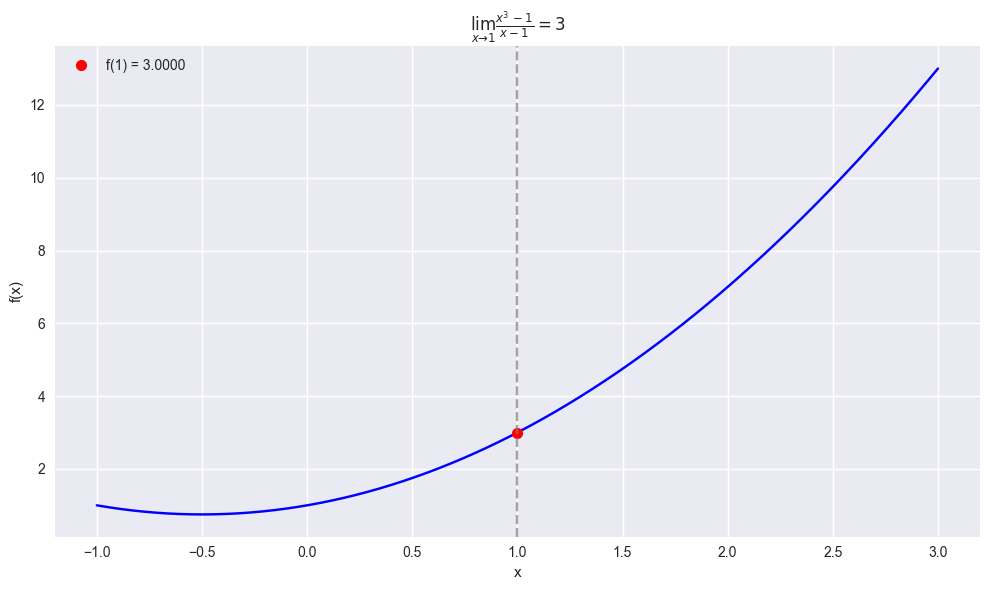

In [4]:
# An example where direct substitution doesn't work
def g(x: float) -> float:
    """Calculate (x^3 - 1)/(x - 1).
    
    Args:
        x: The input value (must not be 1)
        
    Returns:
        The result of (x^3 - 1)/(x - 1) or None if x=1
    """
    return (x**3 - 1)/(x - 1) if x != 1 else None  # The function is undefined at x=1

# Let's approach x = 1 from both sides
x_values = [0.9, 0.99, 0.999, 0.9999, 'x=1', 1.0001, 1.001, 1.01, 1.1]
g_values = []

for x in x_values:
    if x == "x=1":
        g_values.append("undefined")
    else:
        g_values.append(g(x))

# Print the table
print("   x      |    g(x)   ")
print("-"*23)
for x, y in zip(x_values, g_values, strict=True):
    if isinstance(y, str):
        print(f"{x:^10} | {y:^10}")
    else:
        print(f"{x:^10} | {y:^10.6f}")

# But if we factor the numerator, we can find the limit
def g_factored(x: float) -> float:
    """Calculate the factored form of (x^3-1)/(x-1), which is x^2 + x + 1.
    
    Args:
        x: The input value
        
    Returns:
        x^2 + x + 1, which is equivalent to (x^3-1)/(x-1) when x≠1
    """
    # Simple scalar implementation that works with the updated visualize_limit function
    if x == 1:
        return 3.0  # The limit value
    else:
        return x**2 + x + 1  # Equivalent to (x^3-1)/(x-1) when x≠1

# Visualize the limit with the fixed function
fig = visualize_limit(g_factored, 1, title=r"$\lim_{x \to 1} \frac{x^3-1}{x-1} = 3$")

   x      |  sin(x)/x  
-------------------------
   -0.5    |  0.958851 
   -0.1    |  0.998334 
  -0.01    |  0.999983 
  -0.001   |  1.000000 
    0      |  1.000000 
  0.001    |  1.000000 
   0.01    |  0.999983 
   0.1     |  0.998334 
   0.5     |  0.958851 


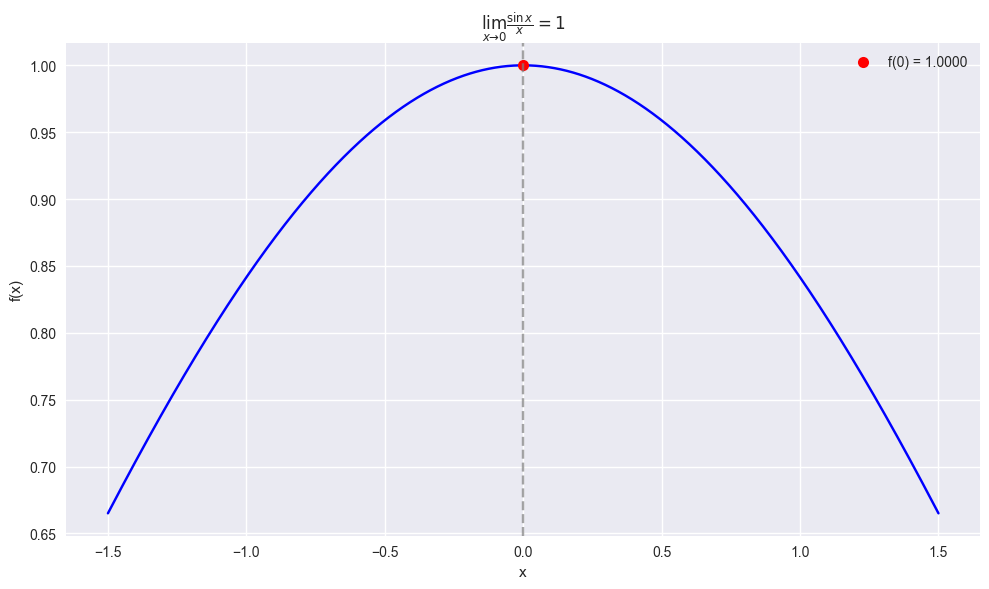

In [5]:
# Let's examine the special limit lim(x→0) sin(x)/x = 1
def h(x: float) -> float:
    """Calculate sin(x)/x, which has a special limit as x approaches 0.
    
    Args:
        x: The input value (can be any number including 0)
        
    Returns:
        sin(x)/x if x≠0, or 1 if x=0 (the limit value)
    """
    # Need to handle x=0 case specially since direct computation would give 0/0
    # Simple scalar implementation that works with the new visualize_limit function
    if x == 0:
        return 1.0
    else:
        return np.sin(x)/x

# Create a table of values approaching x = 0
x_values = [-0.5, -0.1, -0.01, -0.001, 0, 0.001, 0.01, 0.1, 0.5]
h_values = [h(x) for x in x_values]

# Print the table
print("   x      |  sin(x)/x  ")
print("-"*25)
for x, y in zip(x_values, h_values):
    print(f"{x:^10} | {y:^10.6f}")

# Visualize the limit using the updated visualize_limit function
fig = visualize_limit(h, 0, [-1.5, 1.5], title=r"$\lim_{x \to 0} \frac{\sin x}{x} = 1$")

   x      |  sin(x)/x  
-------------------------
   -0.5    |  0.958851 
   -0.1    |  0.998334 
  -0.01    |  0.999983 
  -0.001   |  1.000000 
    0      |  1.000000 
  0.001    |  1.000000 
   0.01    |  0.999983 
   0.1     |  0.998334 
   0.5     |  0.958851 


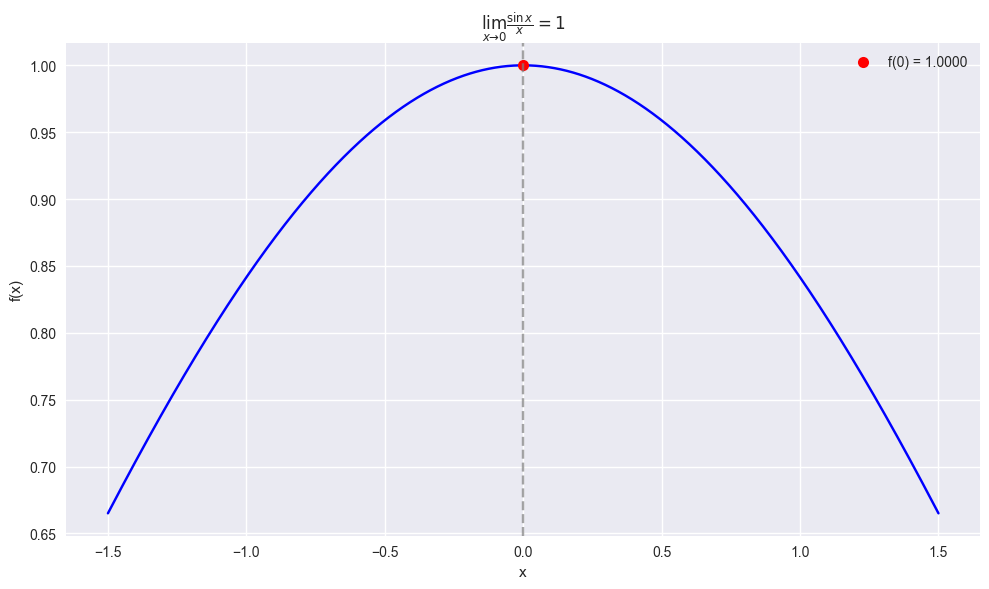

In [6]:
# Let's examine the special limit lim(x→0) sin(x)/x = 1
def h(x: float) -> float:
    """Calculate sin(x)/x, which has a special limit as x approaches 0.
    
    Args:
        x: The input value (can be any number including 0)
        
    Returns:
        sin(x)/x if x≠0, or 1 if x=0 (the limit value)
    """
    # Need to handle x=0 case specially since direct computation would give 0/0
    return np.sin(x)/x if x != 0 else 1  # We're putting 1 here because that's the limit value

# Create a table of values approaching x = 0
x_values = [-0.5, -0.1, -0.01, -0.001, 0, 0.001, 0.01, 0.1, 0.5]
h_values = [h(x) for x in x_values]

# Print the table
print("   x      |  sin(x)/x  ")
print("-"*25)
for x, y in zip(x_values, h_values):
    print(f"{x:^10} | {y:^10.6f}")

# Visualize the limit
fig = visualize_limit(h, 0, [-1.5, 1.5], title=r"$\lim_{x \to 0} \frac{\sin x}{x} = 1$")

## Exercise 2: Finding Limits

For each function, find the limit (if it exists):

1. $\lim_{x \to 3} (x^2 - 4)$
2. $\lim_{x \to 1} \frac{x^3 - 1}{x - 1}$
3. $\lim_{x \to 0} \frac{x + 2}{x^2 + 4}$
4. $\lim_{x \to 2} \frac{|x - 2|}{x - 2}$
5. $\lim_{x \to 0} \frac{\sin(x)}{x}$

For any challenging ones, try making a table of values as x approaches the target value from both sides.

In [7]:
# Let's create functions for each exercise and try to evaluate them

# Function 1: f1(x) = x^2 - 4
def f1(x):
    return x**2 - 4


# Function 2: f2(x) = (x^3 - 1)/(x - 1)
def f2(x):
    if x != 1:
        return (x**3 - 1) / (x - 1)
    else:
        # This is where we would put the limit value if we knew it
        return None


# Function 3: f3(x) = (x + 2)/(x^2 + 4)
def f3(x):
    return (x + 2) / (x**2 + 4)


# Function 4: f4(x) = |x - 2|/(x - 2)
def f4(x):
    if x != 2:
        return abs(x - 2) / (x - 2)
    else:
        return None  # Undefined at x = 2


# Function 5: f5(x) = sin(x)/x
def f5(x):
    if x != 0:
        return np.sin(x) / x
    else:
        return None  # We don't yet know the limit value


# Let's try to evaluate them at different points to see the behavior
functions = [f1, f2, f3, f4, f5]
targets = [3, 1, 0, 2, 0]  # The points we're approaching

for i, (f, target) in enumerate(zip(functions, targets), 1):
    print(f"\nFunction {i}:")
    # Approach from left
    left_values = [target - 0.1, target - 0.01, target - 0.001]
    print(f"Approaching {target} from left:")
    for x in left_values:
        try:
            fx = f(x)
            print(f"  f({x:.4f}) = {fx:.6f}")
        except:
            print(f"  f({x:.4f}) = undefined")

    # Approach from right
    right_values = [target + 0.001, target + 0.01, target + 0.1]
    print(f"Approaching {target} from right:")
    for x in right_values:
        try:
            fx = f(x)
            print(f"  f({x:.4f}) = {fx:.6f}")
        except:
            print(f"  f({x:.4f}) = undefined")


Function 1:
Approaching 3 from left:
  f(2.9000) = 4.410000
  f(2.9900) = 4.940100
  f(2.9990) = 4.994001
Approaching 3 from right:
  f(3.0010) = 5.006001
  f(3.0100) = 5.060100
  f(3.1000) = 5.610000

Function 2:
Approaching 1 from left:
  f(0.9000) = 2.710000
  f(0.9900) = 2.970100
  f(0.9990) = 2.997001
Approaching 1 from right:
  f(1.0010) = 3.003001
  f(1.0100) = 3.030100
  f(1.1000) = 3.310000

Function 3:
Approaching 0 from left:
  f(-0.1000) = 0.473815
  f(-0.0100) = 0.497488
  f(-0.0010) = 0.499750
Approaching 0 from right:
  f(0.0010) = 0.500250
  f(0.0100) = 0.502487
  f(0.1000) = 0.523691

Function 4:
Approaching 2 from left:
  f(1.9000) = -1.000000
  f(1.9900) = -1.000000
  f(1.9990) = -1.000000
Approaching 2 from right:
  f(2.0010) = 1.000000
  f(2.0100) = 1.000000
  f(2.1000) = 1.000000

Function 5:
Approaching 0 from left:
  f(-0.1000) = 0.998334
  f(-0.0100) = 0.999983
  f(-0.0010) = 1.000000
Approaching 0 from right:
  f(0.0010) = 1.000000
  f(0.0100) = 0.999983
  f(

### My solutions

1. $3^3 - 4 = 9 - 4 = 5$
2. $\frac{1^3 -1}{1 -1}$ -> can't work, it's $\frac{0}{0}$!
3. $\frac{0+2}{0^2 + 4} = \frac{2}{4} = \frac{1}{2}$
4. $\frac{0}{0}$ again, undefined
5. you said it's a specicial case, but x->0 so it's probably undefined too?

## Solutions and Feedback

Let's review your solutions:

1. lim_(x→3) (x^2 - 4) = 5
2. lim_(x→1) (x^3 - 1)/(x - 1) = 3
3. lim_(x→0) (x + 2)/(x^2 + 4) = 0.5
4. lim_(x→2) |x - 2|/(x - 2)
   From left (x < 2): -1
   From right (x > 2): 1
   Since these differ, the limit does not exist.
5. lim_(x→0) sin(x)/x = 1


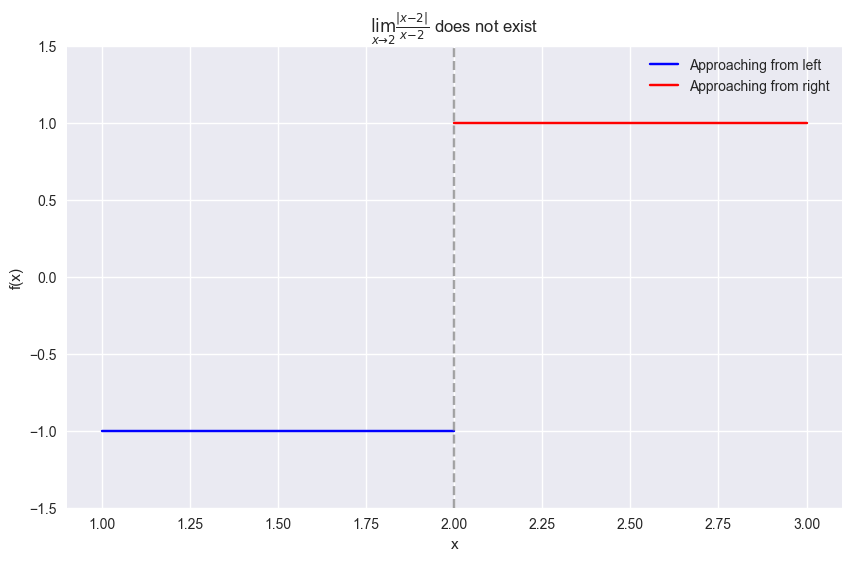

In [8]:
# Solution 1: lim_(x→3) (x^2 - 4)
def solution1():
    x = 3
    return x**2 - 4

result1 = solution1()
print(f"1. lim_(x→3) (x^2 - 4) = {result1}")

# Solution 2: lim_(x→1) (x^3 - 1)/(x - 1)
# We can solve using algebra by factoring the numerator:
# x^3 - 1 = (x-1)(x^2 + x + 1)
def solution2():
    x = 1
    return x**2 + x + 1  # After cancellation

result2 = solution2()
print(f"2. lim_(x→1) (x^3 - 1)/(x - 1) = {result2}")

# Solution 3: lim_(x→0) (x + 2)/(x^2 + 4)
def solution3():
    x = 0
    return (x + 2)/(x**2 + 4)

result3 = solution3()
print(f"3. lim_(x→0) (x + 2)/(x^2 + 4) = {result3}")

# Solution 4 requires analyzing from both sides
print("4. lim_(x→2) |x - 2|/(x - 2)")
print("   From left (x < 2): -1")
print("   From right (x > 2): 1")
print("   Since these differ, the limit does not exist.")

# Solution 5: The special limit
print("5. lim_(x→0) sin(x)/x = 1")

# Let's also visualize solution 4 which is especially interesting
# Create figure for visualization
plt.figure(figsize=(10, 6))

# Create x values manually to avoid array comparison issues
x_left = np.linspace(1, 2-0.0001, 100)
y_left = np.full_like(x_left, -1)  # All -1 values for x < 2

x_right = np.linspace(2+0.0001, 3, 100)
y_right = np.full_like(x_right, 1)  # All 1 values for x > 2

# Plot the function with pre-calculated values
plt.plot(x_left, y_left, "b-", label="Approaching from left")
plt.plot(x_right, y_right, "r-", label="Approaching from right")

# Add vertical line at x=2
plt.axvline(x=2, color="gray", linestyle="--", alpha=0.7)

plt.grid(True)
plt.title(r"$\lim_{x \to 2} \frac{|x-2|}{x-2}$ does not exist")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

1. $\lim_{x \to 3} (x^2 - 4)$
   You're on the right track, but there's a small error. It should be $3^2$ (3 squared), not $3^3$ (3 cubed).
   Correct solution: $3^2 - 4 = 9 - 4 = 5$ ✓

2. $\lim_{x \to 1} \frac{x^3 - 1}{x - 1}$
   You correctly identified that direct substitution gives $\frac{0}{0}$!
   To solve this indeterminate form, we can factor the numerator:
   $x^3 - 1 = (x - 1)(x^2 + x + 1)$
   So our limit becomes:
   $\lim_{x \to 1} \frac{(x - 1)(x^2 + x + 1)}{x - 1} = \lim_{x \to 1} (x^2 + x + 1) = 1^2 + 1 + 1 = 3$

3. $\lim_{x \to 0} \frac{x + 2}{x^2 + 4}$
   Your setup is correct, but there's an error in the calculation.
   Direct substitution gives: $\frac{0 + 2}{0^2 + 4} = \frac{2}{4} = \frac{1}{2}$

4. $\lim_{x \to 2} \frac{|x - 2|}{x - 2}$
   This is trickier! We need to evaluate from both sides:
   - When x < 2: $|x - 2| = -(x - 2)$, so the expression equals -1
   - When x > 2: $|x - 2| = (x - 2)$, so the expression equals 1
   Since these values differ, the limit does not exist.

5. $\lim_{x \to 0} \frac{\sin(x)}{x}$
   You're right that direct substitution gives $\frac{0}{0}$, but this is a special limit that equals 1.
   We can verify by calculating values near x = 0:
   - When x = 0.1, $\frac{\sin(0.1)}{0.1} \approx 0.998$
   - When x = 0.01, $\frac{\sin(0.01)}{0.01} \approx 0.9998$
   As x gets closer to 0, $\frac{\sin(x)}{x}$ gets closer to 1.

Great work tackling these limits! Let's move on to the next lesson.

---

This completes our introduction to limits. Next, we'll use limits to understand derivatives - the foundation of differential calculus.